Uma bola de futebol é chutada com velocidade de 100 km/h, a fazer um ângulo de 10º com o campo (horizontal).



a) Desenvolva um programa que obtenha a lei do movimento e a lei da velocidade em função do tempo, usando o 
método de Euler. Considere inicialmente só a força de gravidade.
Tem confiança que o seu programa está correto?

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Ex1
#a) lei do movimento e da velocidade
#dados: velocidade - 27.78
def euler():
    dt = 0.01
    tf = 2
    n = int(tf/dt+0.1)

    t = np.empty(n)
    vy = np.empty(n)
    ay = np.empty(n)
    y = np.empty(n)
    x = np.empty(n)
    vx = np.empty(n)
    ax = np.empty(n)

    g = 9.80
    vy0 = 4.82
    vy[0] = vy0
    t[0] = 0
    y[0] = 0
    x[0] = 0
    vx[0] = 27.36 #100/3.6

    for i in range(n-1):
        t[i+1] = t[i]+dt
        ax[i] = 0
        ay[i] = -g
        vy[i+1] = vy[i]+ay[i]*dt
        vx[i+1] = vx[i]+ax[i]*dt
        x[i+1] = x[i]+vx[i]*dt
        y[i+1] = y[i]+vy[i]*dt

    return t, y, vy, x, vx, n

t, y, vy, x, vx, n = euler()

for i in range(n-1):
    if y[i+1] < 0+0.03 and y[i+1] > 0-0.03:
        print(f'Chegada ao solo - tempo: {t[i+1]}; posiçãox: {x[i+1]};')

for i in range(n-1):
    if vy[i+1] < 0+0.03 and vy[i+1] > 0-0.03:
        print(f'Altura máxima - tempo: {t[i+1]}; posiçãoy: {y[i+1]};\n')


Chegada ao solo - tempo: 0.9900000000000007; posiçãox: 27.086399999999934;
Altura máxima - tempo: 0.49000000000000027; posiçãoy: 1.2093200000000013;



b) Atualize o seu programa de modo a considerar a força de resistência do ar. A força de resistência do ar ao 
movimento da bola.Faça o gráfico da altura em função da distância percorrida na horizontal.

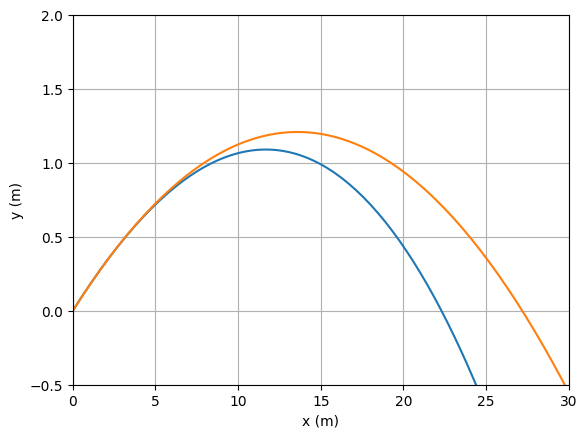

In [2]:
#b) mesma coisa com resistencia do ar 
def euler2():
    dt = 0.01
    tf = 2
    n = int(tf/dt+0.1)

    t = np.empty(n)
    vy = np.empty(n)
    ay = np.empty(n)
    y = np.empty(n)
    x = np.empty(n)
    vx = np.empty(n)
    ax = np.empty(n)

    g = 9.80
    vt = 27.78
    vy0 = 4.82
    vy[0] = vy0
    t[0] = 0
    y[0] = 0
    x[0] = 0
    vx[0] = 27.36

    for i in range(n-1):
        t[i+1] = t[i]+dt
        vv = np.abs(np.sqrt(vx[i]**2 +vy[i]**2))
        D = g/vt**2
        ax[i] = -D*vv*vx[i]
        ay[i] = -g-D*vv*vy[i]
        vy[i+1] = vy[i]+ay[i]*dt
        vx[i+1] = vx[i]+ax[i]*dt
        x[i+1] = x[i]+vx[i]*dt
        y[i+1] = y[i]+vy[i]*dt
    return t, y, vy, x, vx, n

t2, y2, vy2, x2, vx2, n = euler2()

plt.plot(x2, y2)
plt.plot(x, y)
plt.ylim(-0.5, 2)
plt.xlim(0, 30)
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.grid()
plt.show()


c) Nas condições da alínea b), determine qual a altura máxima atingida pela bola e em que instante. Tem confiança 
no seu resultado?

In [3]:

for i in range(n-1):
    if vy2[i+1] < 0+0.05 and vy2[i+1] > 0-0.05:
        print(f'Altura máxima - tempo: {t2[i+1]}; posiçãoy: {y2[i+1]};\n')


Altura máxima - tempo: 0.45000000000000023; posiçãoy: 1.090346066574345;




d) Nas condições da alínea b), qual o alcance (distância entre a posição onde foi chutada e o ponto onde alcançou no 
campo) da trajetória da bola e quanto tempo demorou? Tem confiança no seu resultado?

In [4]:
for i in range(n-1):
    if y2[i+1] < 0+0.01 and y2[i+1] > 0-0.01:
        print(f'Chegada ao solo - tempo: {t2[i+1]}; posiçãox: {x2[i+1]};\n')

Chegada ao solo - tempo: 0.9400000000000006; posiçãox: 22.263332913229767;



Problema:
Determinar se é golo ou não, a bola ser chutada do canto com rotação. Implementar o movimento da 
bola com rotação, usando o método de Euler. Modificar um programa anterior que seja semelhante e 
adicionar a parte do método de Euler correspondente à dimensão extra z



Golo!!


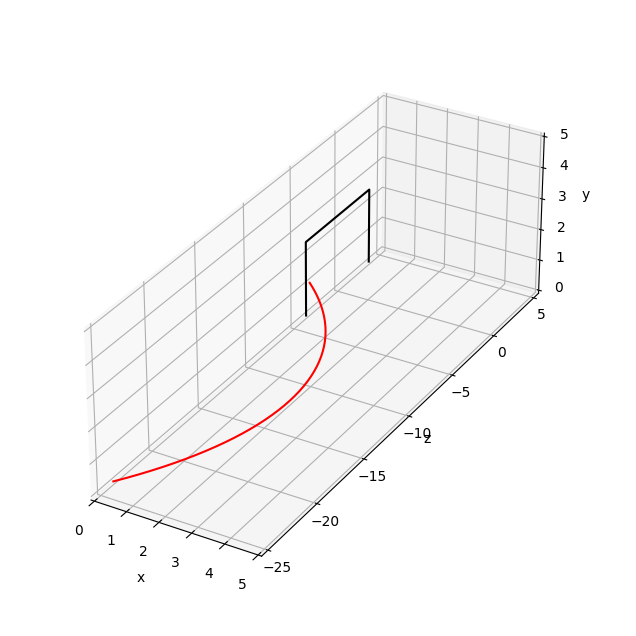

In [6]:
def euler3():
    dt = 0.01
    tf = 2
    n = int(tf/dt+0.1)

    t = np.empty(n)
    vy = np.empty(n)
    ay = np.empty(n)
    y = np.empty(n)
    x = np.empty(n)
    vx = np.empty(n)
    ax = np.empty(n)
    z = np.empty(n)
    vz = np.empty(n)
    az = np.empty(n)
    w = np.array([0, 400, 0]) #rotação da bola
    v = np.array([25, 5, -50]) #velocidade bola
    r = np.array([0, 0, 23.8])

    g = 9.80
    vt = 100/3.6
    vy[0] = v[1]
    t[0] = 0
    y[0] = r[1]
    x[0] = r[0]
    z[0] = r[2]
    vx[0] = v[0]
    vz[0] = v[2]

    for i in range(n-1):
        F = 0.5 * np.pi * (0.11**2) * 1.225 * 0.11 * np.cross(w, np.array([vx[i], vy[i], vz[i]]))
        a = F/0.45
        t[i+1] = t[i]+dt
        vv = np.abs(np.sqrt(vx[i]**2 + vy[i]**2 + vz[i]**2))
        D = g/vt**2
        ax[i] = -D*vv*vx[i]+a[0]
        ay[i] = -g-D*vv*vy[i]+a[1]
        az[i] = -D*vv*vz[i]+a[2]
        vy[i+1] = vy[i]+ay[i]*dt
        vx[i+1] = vx[i]+ax[i]*dt
        vz[i+1] = vz[i]+az[i]*dt
        x[i+1] = x[i]+vx[i]*dt
        y[i+1] = y[i]+vy[i]*dt
        z[i+1] = z[i]+vz[i]*dt

    return t, y, vy, x, vx, z, vz, n

t3, y3, vy3, x3, vx3, z3, vz3, n = euler3()

plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.plot3D(x3[x3>=0],-z3[x3>=0],y3[x3>=0], 'r')
goalx = [0,0,0,0]
goaly = [0,2.4,2.4,0]
goalz = [-3.66,-3.66,3.66,3.66]
ax.plot3D(goalx,goalz,goaly, 'k')
ax.set_xlim3d(0, 5)
ax.set_ylim3d(-25, 5)
ax.set_zlim3d(0, 5)
ax.set_box_aspect((2,6,2))
ax.set_xlabel('x')
ax.set_ylabel('z')
ax.set_zlabel('y')

#resposta
print("Golo!!")